# Multiple testing

In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

**1**. With a significance level of 0.05, the probability of getting a success by chnace is 0.05. Plot the distribution for the number of successful tests by chance alone (Type 1 Error) in 1,000 tests under the null hypothesis. Set `x = 0:100`.

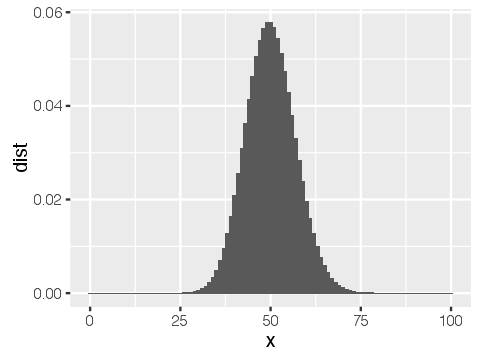

In [3]:
n <- 1000
p <- 0.05
x <- 0:100
dist <- dbinom(x, n, p)
ggplot(data.frame(dist=dist), aes(x=x, y=dist)) + geom_bar(stat="identity")

**2**. Plot the distribution if you made the significance more stringent by dividing $p$ by $n$. Set `x = 0:2`.

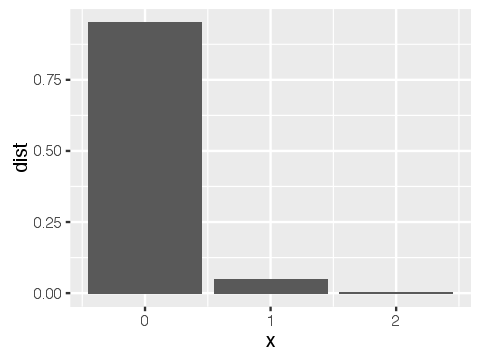

In [4]:
n <- 1000
p <- 0.05/n
x <- 0:2
dist <- dbinom(x, n, p)
ggplot(data.frame(dist=dist), aes(x=x, y=dist)) + geom_bar(stat="identity")

**3**. Do the following simulation. In each experiment, generate 10 ("gene") values from the standard normal distribution for group 1, and 10 values from the standard normal distribution for group 2. Use a two-sample two-sided t-test with $\alpha =0.05$ to find the p-value. Repeat the experiment 10,000 times and plot the distribution of p-values. Note that **none** of the genes are really different. This simulates p-values from the comparison of 10,000 genes across two groups of size 10.

In [5]:
expt <- function(n=10) {
    n1 <- rnorm(n)
    n2 <- rnorm(n)
    return(t.test(n1, n2)$p.value)
}

In [6]:
m <- 10000
ps <- rep(NA, m)
for (i in 1:m) {
    ps[i] <- expt()
}

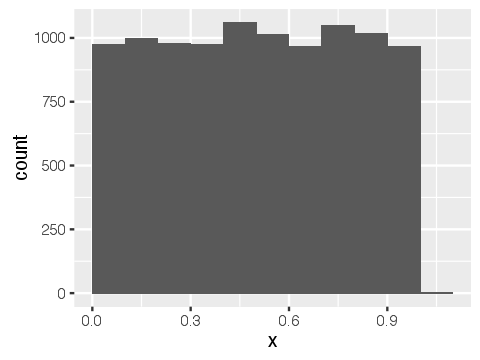

In [7]:
ggplot(data.frame(x=ps), aes(x=x)) + geom_histogram(center=0.05, bins=11)

**4**. Repeat the simulation from **3** with one group having a mean of 0.5. This is considered to be a "medium" effect size. Note that **all** of the genes are really different.

In [8]:
expt <- function(n=10) {
    n1 <- rnorm(n, mean=0.5)
    n2 <- rnorm(n)
    return(t.test(n1, n2)$p.value)
}

In [9]:
m <- 10000
ps <- rep(NA, m)
for (i in 1:m) {
    ps[i] <- expt()
}

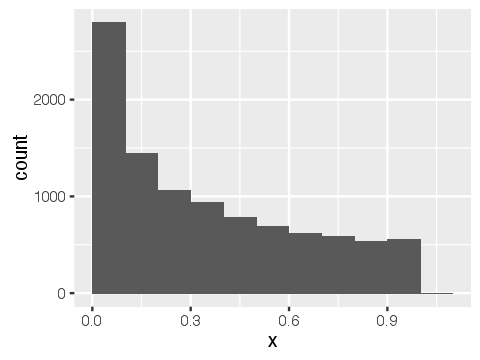

In [10]:
ggplot(data.frame(x=ps), aes(x=x)) + geom_histogram(center=0.05, bins=11)

**5**. Repeat the simulation from **4** but increase the group size to 25. We see that the power (fraction of p-values less than 0.05) increases as the sample size grows.

In [11]:
expt <- function(n=25) {
    n1 <- rnorm(n, mean=0.5)
    n2 <- rnorm(n)
    return(t.test(n1, n2)$p.value)
}

In [12]:
m <- 10000
ps <- rep(NA, m)
for (i in 1:m) {
    ps[i] <- expt()
}

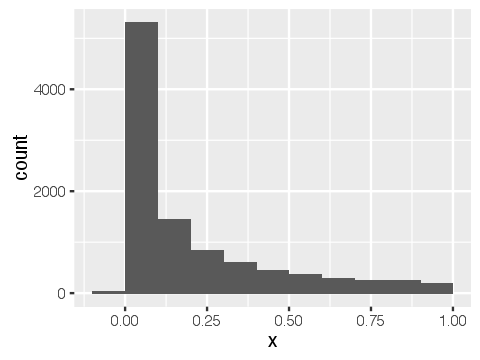

In [13]:
ggplot(data.frame(x=ps), aes(x=x)) + geom_histogram(center=0.05, bins=11)

**6**. There is another way to get the null distribution of p-values in **3** even when there are genes with differences across the two groups. The difference only arises because we know the labels (group 1 or group 2) for every subject. If we randomly mixed up the labels, any resulting differnce must be due to chance. So we can estimate the null distribution from **permutations** of the subject labels. Let's do this for a single gene to provide another perspective on what the p-value means.

In [14]:
# actual observed values
n <- 10
v1 <- rnorm(n, mean=0.5)
v2 <- rnorm(n)
p <- t.test(v1, v2)$p.value

v.combined <- c(v1, v2)

reps <- 10000
ps <- rep(NA, reps)
for (i in 1:reps) {
    # label permutation
    idx <- sample(1:(2*n))
    # assign new groups based on permuted labels
    w1 <- v.combined[idx[1:n]]
    w2 <- v.combined[idx[(n+1):(2*n)]]
    ps[i] <- t.test(w1, w2)$p.value
}

[1] 0.7423

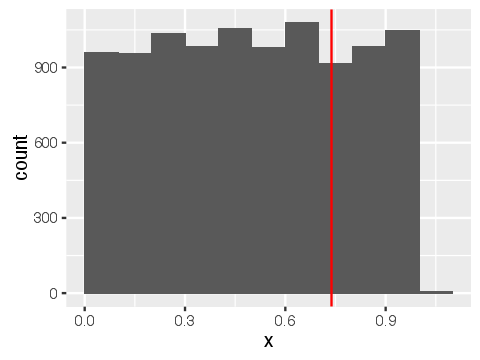

In [15]:
ggplot(data.frame(x = ps), aes(x = x)) + 
geom_histogram(center=0.05, bins=11) + 
geom_vline(aes(xintercept=p), color='red')
sum(ps < p)/reps

**7**. What is the chance of getting one or more false positives as more tests are conducted? We use the formula derived from first principles $1 - (1 - p)^k$

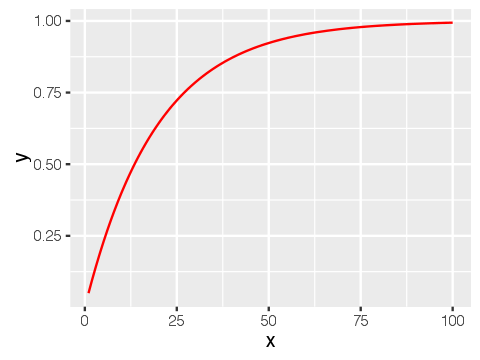

In [16]:
x <- 1:100 # number of tests
y <- 1 - (1-0.05)^x
ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + geom_line(color="red")

**8**. We can also get this using the binomial distribution, since we are asking for the probability of more than 0 successes in $k$ trials.

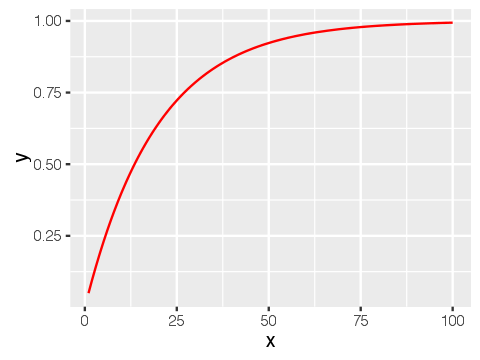

In [17]:
x <- 1:100 # number of tests
y <- 1 - pbinom(0, x, 0.05) # we can use pbinom or dbinom here - why?
ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + geom_line(color="red")

**9**. We can make the significance level so small that we ensure that we get a false positive for **all** tests with a probability of less than 0.05 - i.e. controlling for the **Family-Wise Error Rate** (FWER). Sidak's method sets the Type 1 error rate for each test to be $1 - (1-\text{FWER})^(1/m)$, where $m$ is the number of tests. 

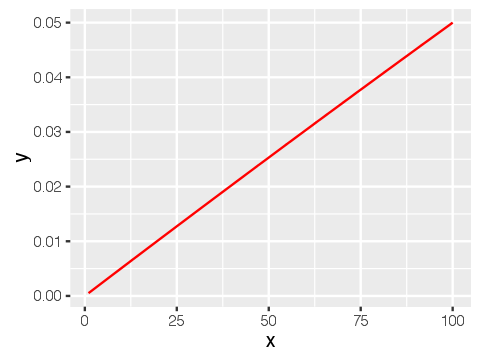

In [18]:
m <- 100
p <- 1 - (1-0.05)^(1/m)
x <- 1:m
y <- 1 - (1-p)^x
ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + geom_line(color="red")

**10**. The simpler Bonferroni correction where the Type I error rate of each test is $\text{FWER}/m$ gives very similar results.

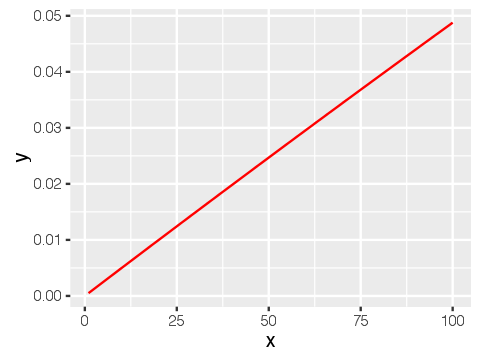

In [19]:
m <- 100
p <- 0.05/m
x <- 1:m
y <- 1 - (1-p)^x
ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + geom_line(color="red")

**11**. The Bonferroni adjusted p-value is simply $\min(m \times \text{FWER}, 1)$. 

In [20]:
expt <- function(n=10) {
    n1 <- rnorm(n, mean=1.0)
    n2 <- rnorm(n)
    return(t.test(n1, n2)$p.value)
}

In [21]:
m <- 10
ps <- rep(NA, m)
for (i in 1:m) {
    ps[i] <- expt()
}

In [22]:
df <- data.frame("Unadusted" = ps, "Adjusted" = ifelse(m * ps < 1, m *ps, 1))
df %>% arrange(Adjusted)

Unadusted   Adjusted
1  0.001674364 0.01674364
2  0.003876368 0.03876368
3  0.004811491 0.04811491
4  0.011910816 0.11910816
5  0.045489564 0.45489564
6  0.047229928 0.47229928
7  0.047553586 0.47553586
8  0.201190426 1.00000000
9  0.408043241 1.00000000
10 0.105436762 1.00000000

**12**. Permutation adjusted p-value.

In [23]:
n <- 10 # sample size per group
m <- 10 # number of genes tested
group1 <- replicate(n, rnorm(m, mean=1))
group2 <- replicate(n, rnorm(m))

# Artificially create correlated genes by making even rows twice odd rows
group1[seq(2, m, by=2),] = 2*group1[seq(1, m, by=2),]
group2[seq(2, m, by=2),] = 2*group2[seq(1, m, by=2),]

ps <- rep(NA, m)
for (i in 1:m) {
    ps[i] <- t.test(group1[i,], group2[i,])$p.value
}

#### Bonferroni-adjusted

In [24]:
df <- data.frame("Unadusted" = ps, "Adjusted" = ifelse(m * ps < 1, m *ps, 1))
df %>% arrange(Adjusted)

Unadusted   Adjusted
1  0.001019007 0.01019007
2  0.001019007 0.01019007
3  0.001332310 0.01332310
4  0.001332310 0.01332310
5  0.018353418 0.18353418
6  0.018353418 0.18353418
7  0.038614804 0.38614804
8  0.038614804 0.38614804
9  0.131703826 1.00000000
10 0.131703826 1.00000000

#### Permutation-adjusted value for gene with lowest p-value 

This is just for one gene. Repeat for the gene with the 2nd lowest p value etc. If we were to do all genes, we would store the permuted p-values in a matrix for efficiency, but this code is just to illustrate the idea.

In [25]:
reps <- 10000
ps1.min <- rep(NA, reps)
for (i in 1:reps) {
    # label permutation

    ps1 <- rep(NA, m)
    for (j in 1:m) {
        values <- c(group1[j,], group2[j,])
        idx <- sample(1:(2*n))
        
        # assign new groups based on permuted labels
        w1 <- values[idx[1:n]]
        w2 <- values[idx[(n+1):(2*n)]]
        ps1[j] <- t.test(w1, w2)$p.value
    }
    ps1.min[i] <- min(ps1)
}

In [26]:
p1 <- min(ps)
p1.adjusted <- sum(ps1.min < p1)/reps
c("Unadjusted" = p1, "Adjusted" = p1.adjusted)

Unadjusted    Adjusted 
0.001019007 0.008100000

**13**. False discovery rate (Benjamini-Hochberg)

In [27]:
df <- data.frame("p" = ps) %>% arrange(p)
df["compare"] = (0.05 * 1:m)/m
df["FDR reject null"] = df$p < df$compare
df["Bonferroni"] = ifelse(m * df$p < 1, m *df$p, 1)
df["FWER reject null"] = df$Bonferroni < 0.05
print(df)

             p compare FDR reject null Bonferroni FWER reject null
1  0.001019007   0.005            TRUE 0.01019007             TRUE
2  0.001019007   0.010            TRUE 0.01019007             TRUE
3  0.001332310   0.015            TRUE 0.01332310             TRUE
4  0.001332310   0.020            TRUE 0.01332310             TRUE
5  0.018353418   0.025            TRUE 0.18353418            FALSE
6  0.018353418   0.030            TRUE 0.18353418            FALSE
7  0.038614804   0.035           FALSE 0.38614804            FALSE
8  0.038614804   0.040            TRUE 0.38614804            FALSE
9  0.131703826   0.045           FALSE 1.00000000            FALSE
10 0.131703826   0.050           FALSE 1.00000000            FALSE


**14**. Using `multtest` from `BioConductor`.

In [28]:
suppressMessages(library(multtest))

In [29]:
procedures = c("Bonferroni", "Holm", "BH")
adjusted = mt.rawp2adjp(df$p, procedures)
adjusted$adjp

rawp Bonferroni       Holm          BH
 [1,] 0.001019007 0.01019007 0.01019007 0.003330774
 [2,] 0.001019007 0.01019007 0.01019007 0.003330774
 [3,] 0.001332310 0.01332310 0.01065848 0.003330774
 [4,] 0.001332310 0.01332310 0.01065848 0.003330774
 [5,] 0.018353418 0.18353418 0.11012051 0.030589030
 [6,] 0.018353418 0.18353418 0.11012051 0.030589030
 [7,] 0.038614804 0.38614804 0.15445922 0.048268505
 [8,] 0.038614804 0.38614804 0.15445922 0.048268505
 [9,] 0.131703826 1.00000000 0.26340765 0.131703826
[10,] 0.131703826 1.00000000 0.26340765 0.131703826